## Imports

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import random


## Functions

In [2]:
def converter(p1, p2):
    '''defines process of conversion'''
    if p1 == 'A':
        if p2 == 'B':
            p3 = p4 = 'C'
        if p2 == 'C':
            p3 = p4 = 'B'
            
    if p1 == 'B':
        if p2 == 'A':
            p3 = p4 = 'C'
        if p2 == 'C':
            p3 = p4 = 'A'
            
    if p1 == 'C':
        if p2 == 'A':
            p3 = p4 = 'B'
        if p2 == 'B':
            p3 = p4 = 'A'

    return p3, p4

In [3]:
def collision(a, b, c, display):
    '''simulates conversion with given starting parameters and alters box constituents'''
    if a==b==0 or b==c==0 or a==c==0:
        return a, b, c
    particles = ['A'] * a + ['B'] * b + ['C'] * c
    p1 = p2 = 0
    while p1 == p2:
        p1, p2 = random.sample(particles, 2)
    particles.remove(p1)
    particles.remove(p2)
    p3, p4 = converter(p1, p2)
    particles.append(p3)
    particles.append(p4)

    if display:
        return p3
        
    return particles.count('A'), particles.count('B'), particles.count('C')

In [51]:
def collision_sim(a0, b0, c0, T, show_plot, stop_early):
    '''simulates process of length T'''
    a_vals = [a0]
    b_vals = [b0]
    c_vals = [c0]
    a_dom, b_dom, c_dom = 0, 0, 0
    tot = a0 + b0 + c0
    a, b, c = a0, b0, c0
    time = T
    
    for i in range(1, T+1):
        a, b, c = collision(a, b, c, False)
        a_vals.append(a)
        b_vals.append(b)
        c_vals.append(c)
        m = max(a,b,c)
        
        if m == a:
            if m != b and m != c:
                a_dom += 1
        elif m == b:
            if m != a and m != c:
                b_dom += 1
        else:
            c_dom += 1
        
        if stop_early:
            if a==tot or b==tot or c==tot:
                time = i
                break
       
    if show_plot:
        t = np.linspace(0, time, time+1)
        plt.step(t, a_vals, label='A', where='post')
        plt.step(t, b_vals, label='B', where='post')
        plt.step(t, c_vals, label='C', where='post')
        plt.title('Step plot of particles over time')
        plt.xlabel('Time')
        plt.ylabel('No. of particles')
        plt.grid(True)
        plt.legend()
        plt.show()

#     return t,a_vals,b_vals,c_vals

    return np.around(np.array([a_dom, b_dom, c_dom]) / time, 3)


In [52]:
def collision_aggregator(a, b, c, T, iterations, stop_early):
    '''simulates many processes and aggregates'''
    vals = np.zeros(3)
    
    for _ in range(iterations):
        vals += collision_sim(a, b, c, T, False, stop_early)

    return vals / iterations


## Main

### Collision plots

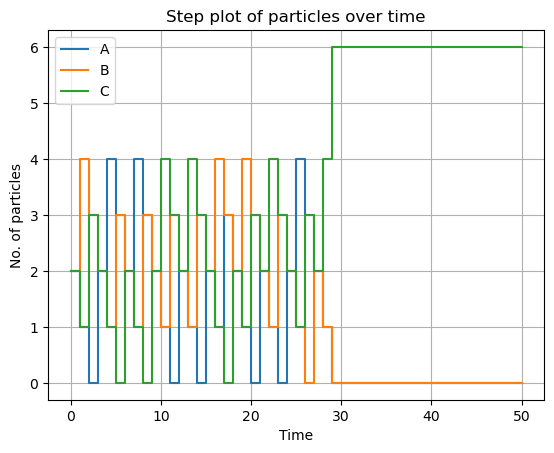

In [150]:
_ = collision_sim(2,2,2,50,True,False)


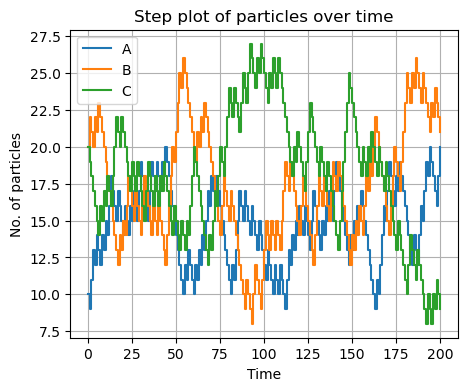

A dominant: 8.0%, B dominant: 33.5%, C dominant: 45.5%


In [90]:
plt.figure(figsize=(5,4))
values = collision_sim(10,20,20,200,True,False)
print(f'A dominant: {round(100*values[0], 1)}%, B dominant: {round(100*values[1],1)}%, C dominant: {round(100*values[2],1)}%')


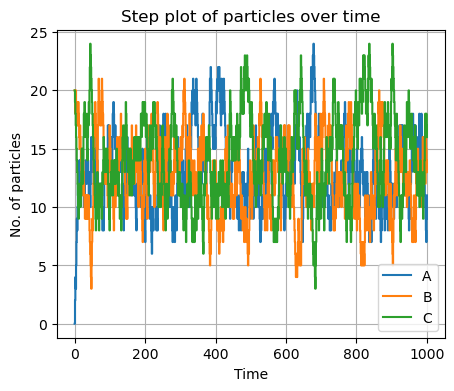

A dominant: 33.4%, B dominant: 20.8%, C dominant: 37.2%


In [103]:
plt.figure(figsize=(5,4))
values = collision_sim(0,20,20,1000,True,False)
print(f'A dominant: {round(100*values[0], 1)}%, B dominant: {round(100*values[1],1)}%, C dominant: {round(100*values[2],1)}%')


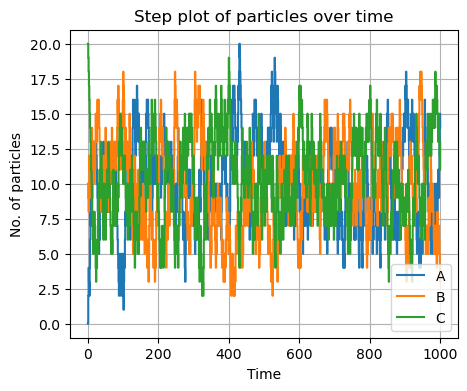

A dominant: 31.2%, B dominant: 31.5%, C dominant: 37.3%


In [151]:
plt.figure(figsize=(5,4))
values = collision_sim(0,10,20,1000,True,False)
print(f'A dominant: {round(100*values[0], 1)}%, B dominant: {round(100*values[1],1)}%, C dominant: {round(100*values[2],1)}%')


### Domination

#### $y_0=(2,1,1)$

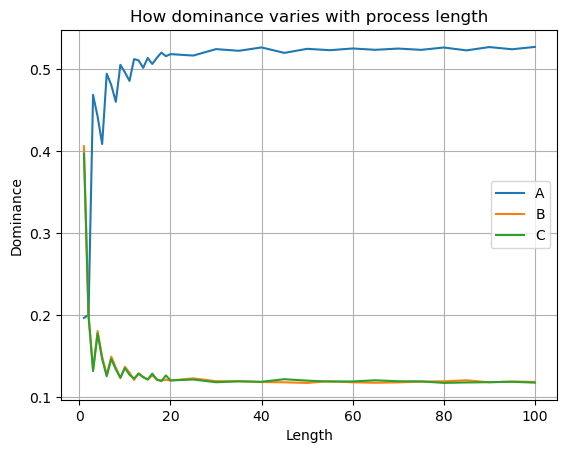

In [35]:
iterations = 10000
n_val = np.concatenate((np.arange(1,20,1), np.arange(20,101,5)))
dominance_val = [collision_aggregator(2, 1, 1, n, iterations, True) for n in n_val]

plt.plot(n_val, dominance_val, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


#### $y_0=(10,20,20)$

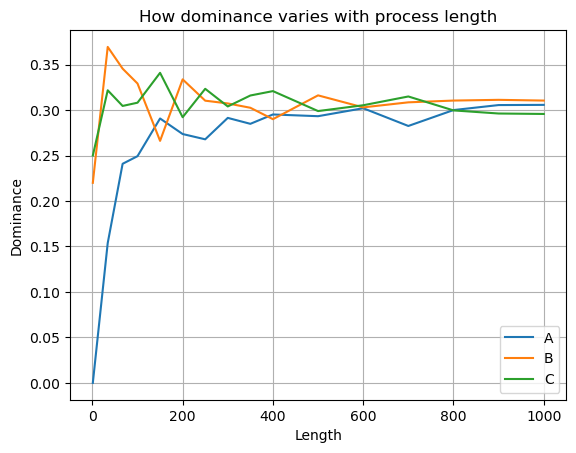

In [104]:
iterations = 1000
n_vals = np.concatenate((np.arange(1,101,33), np.arange(150,401,50), np.arange(500,1001,100)))
dominance_vals = [collision_aggregator(10, 20, 20, n, iterations, True) for n in n_vals]

plt.plot(n_vals, dominance_vals, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


#### $y_0=(0,20,20)$

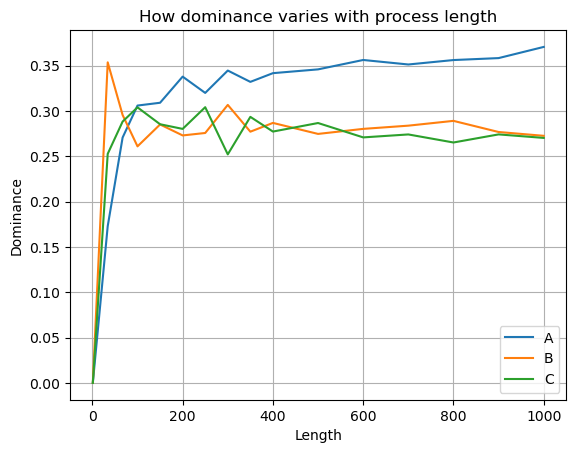

In [107]:
iterations = 100
n_values = np.concatenate((np.arange(1,101,33), np.arange(150,401,50), np.arange(500,1001,100)))
dom_vals = [collision_aggregator(0, 20, 20, n, iterations, True) for n in n_values]

plt.plot(n_values, dom_vals, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


#### $\text{Varying } a_0$

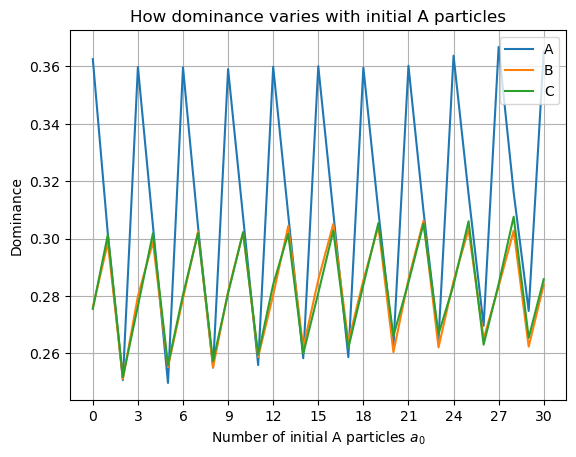

In [142]:
iterations = 1200
a_vals = np.arange(0,31)
domin_vals = [collision_aggregator(a, 20, 20, 2000, iterations, True) for a in a_vals]

plt.plot(a_vals, domin_vals, '-', label = ['A','B','C'])
plt.title('How dominance varies with initial A particles')
plt.xlabel('Number of initial A particles $a_0$')
plt.ylabel('Dominance')
plt.xticks([3*i for i in range(11)])
plt.grid()
plt.legend()
plt.show()


#### $y_0=(0,10,20)$

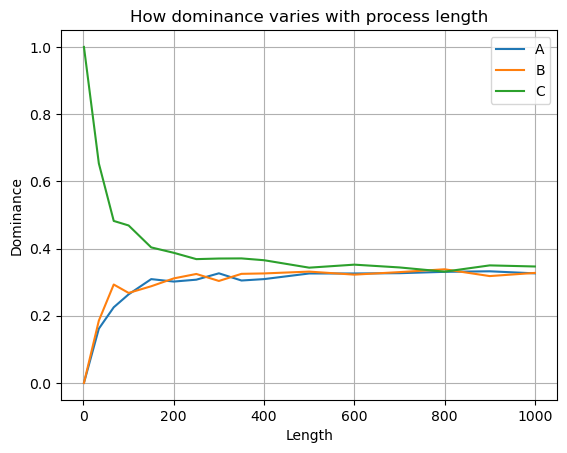

In [154]:
iterations = 100
n_values = np.concatenate((np.arange(1,101,33), np.arange(150,401,50), np.arange(500,1001,100)))
dom_vals = [collision_aggregator(0, 10, 20, n, iterations, True) for n in n_values]

plt.plot(n_values, dom_vals, label = ['A','B','C'])
plt.title('How dominance varies with process length')
plt.xlabel('Length')
plt.ylabel('Dominance')
plt.legend()
plt.grid()
plt.show()


### Families

In [15]:
def family_calc(families, y0, counter=0):
    if y0 not in families:
        families.append(y0)
    
    for i in range(3):
        temp = y0
        indices = [0, 1, 2]
        indices.remove(i)
        index1, index2 = indices
        add_func = [-1, -1, -1]
        add_func[i] = 2
        if temp[index1] > 0 and temp[index2] > 0:
            new_temp = [x + y for x, y in zip(temp, add_func)]
            new_temp = [max(0, x) for x in new_temp]
            if new_temp not in families:
                families.append(new_temp)
                family_calc(families, new_temp)

    return families


In [16]:
result = family_calc([], [1,2,2])
print(result)


[[1, 2, 2], [3, 1, 1], [5, 0, 0], [2, 3, 0], [2, 0, 3], [0, 4, 1], [0, 1, 4]]
